# Adelaide wave converters - Data Set 

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
from sklearn.linear_model import LogisticRegression
import string
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import Data_sets

### Data cleaning and preperations

In [25]:
adelaide_df = pd.read_csv("Data_sets/Adelaide_Data.csv")
adelaide_df.columns = [f'X{i+1}' for i in range(16)] + [f'Y{i+1}' for i in range(16)] + [f'P{i+1}' for i in range(16)] +['Power_all']


adelaide_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,P8,P9,P10,P11,P12,P13,P14,P15,P16,Power_all
0,530.3136,68.7031,31.5983,175.2582,516.1441,63.4652,67.0954,369.4486,14.0930,375.4462,...,83920.1033,80968.0044,87108.1328,68065.1856,99061.3812,77549.1426,99013.1628,78234.4337,84633.6493,1340929.765
1,27.3967,399.0488,565.6854,394.0466,120.2245,558.1293,546.4520,27.3256,314.1051,235.9476,...,97358.7395,93437.7170,69940.2554,92864.1192,60887.8095,72306.6556,81151.1515,83030.9726,94779.6131,1352031.511
2,346.1526,59.6375,226.2742,280.9095,402.2161,218.7181,207.0407,339.5676,0.0000,0.0000,...,80399.3841,89349.6141,85048.3860,70038.2271,92797.3569,97653.8121,74903.3740,71690.6549,96220.4768,1396754.375
3,317.9144,551.8542,335.4745,40.0240,316.6285,365.6434,416.3060,562.1028,211.3577,143.1255,...,97088.1761,81187.3982,63591.6729,92418.1977,82454.8256,97091.7749,85937.5437,66823.1572,93683.0996,1355708.577
4,370.1551,438.7171,222.3375,153.1610,429.7656,478.7805,303.1690,448.9657,98.8592,29.9884,...,97335.9836,70670.4876,57081.2420,86038.3420,83643.1803,97737.5596,85684.3216,57476.9499,85025.9075,1308546.042


In [26]:
adelaide_df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,P8,P9,P10,P11,P12,P13,P14,P15,P16,Power_all
count,71998.000000,71998.000000,71998.000000,71998.000000,71998.000000,71998.00000,71998.000000,71998.000000,71998.000000,71998.000000,...,71998.000000,71998.000000,71998.000000,71998.000000,71998.000000,71998.000000,71998.000000,71998.000000,71998.000000,7.199800e+04
mean,281.278434,279.316799,294.138170,263.820014,290.190835,246.81052,252.474533,322.613080,280.746168,288.405246,...,88436.614802,88332.383742,87564.257977,88660.580440,88425.330170,87185.332906,87704.044108,89191.016479,88471.341006,1.410073e+06
std,178.320730,178.037942,182.138518,194.869224,179.635262,191.37862,178.340115,178.435158,190.274938,178.158481,...,10108.714997,10156.727576,10174.942637,10515.851087,10489.615606,10565.592524,10430.137566,10442.295312,10572.653000,5.600749e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,51444.747000,51304.021600,49409.891500,49814.045300,51660.410600,50205.352800,51141.599700,50628.552800,47273.983600,1.191378e+06
25%,117.006825,116.477225,116.269200,76.570500,123.092425,67.49445,89.111750,166.917500,103.627400,126.430400,...,81445.599325,81102.055325,80546.816775,80803.156425,80789.259225,79083.946125,79920.262800,81584.169325,80400.514400,1.371209e+06
50%,282.731850,280.674850,315.467050,247.231900,286.194300,214.91815,233.673750,356.337700,267.173600,288.203900,...,90310.888500,90083.739600,88073.889100,91008.722450,89940.659550,87663.436400,89004.129150,92113.493100,90698.590550,1.402170e+06
75%,437.294500,444.122000,455.154275,444.659350,460.148200,433.31165,408.797950,481.671800,464.014100,448.372850,...,97418.742850,97448.086300,97336.088325,97813.297875,97720.390650,97475.936600,97501.542600,98072.961125,97663.106325,1.446065e+06
max,566.000000,566.000000,566.000000,566.000000,566.000000,566.00000,566.000000,566.000000,566.000000,566.000000,...,105790.374500,105526.299600,105420.107400,105395.279300,105539.986600,105447.760000,105301.202500,104602.318800,105390.327100,1.583052e+06


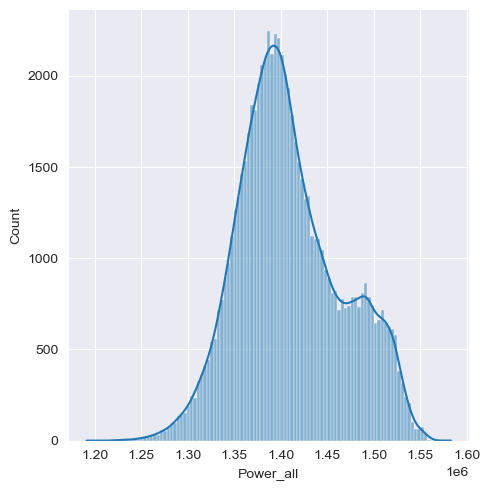

In [27]:
sns.displot(adelaide_df['Power_all'], kde=True)

In [28]:
# Usunięcie wszystkich kolumn Pi (P1 do P16)
columns_to_remove = [f"P{i}" for i in range(1, 17)]
adelaide_new_df = adelaide_df.drop(columns=columns_to_remove, errors='ignore')

adelaide_df = adelaide_new_df
print("Kolumny po usunięciu P1-P16:", adelaide_df.columns)

adelaide_df.head(10)


Kolumny po usunięciu P1-P16: Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6',
       'Y7', 'Y8', 'Y9', 'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16',
       'Power_all'],
      dtype='object')


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,Y8,Y9,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Power_all
0,530.3136,68.7031,31.5983,175.2582,516.1441,63.4652,67.0954,369.4486,14.0930,375.4462,...,248.7212,415.6457,410.1439,156.3712,532.9900,280.7516,559.2803,208.7441,531.3943,1340929.765
1,27.3967,399.0488,565.6854,394.0466,120.2245,558.1293,546.4520,27.3256,314.1051,235.9476,...,498.6277,435.2397,35.5588,148.9206,48.0585,317.9832,26.8732,483.0186,359.0875,1352031.511
2,346.1526,59.6375,226.2742,280.9095,402.2161,218.7181,207.0407,339.5676,0.0000,0.0000,...,217.2239,562.7245,347.2173,0.0000,272.3906,178.4930,317.5044,235.5983,19.6762,1396754.375
3,317.9144,551.8542,335.4745,40.0240,316.6285,365.6434,416.3060,562.1028,211.3577,143.1255,...,536.6741,143.3888,48.6452,109.5254,377.3113,530.8384,463.1129,42.6895,367.9045,1355708.577
4,370.1551,438.7171,222.3375,153.1610,429.7656,478.7805,303.1690,448.9657,98.8592,29.9884,...,423.5370,256.5259,161.7823,0.0000,264.1742,417.7013,349.9758,155.8266,254.7675,1308546.042
5,538.5188,76.2676,0.0000,542.6561,549.9406,105.8695,1.9156,45.2259,135.5680,437.2929,...,69.9570,525.0923,476.2377,419.2540,15.7628,170.1425,53.9149,551.3931,43.4459,1424838.348
6,565.6854,362.3064,0.0000,146.6763,241.4689,501.8493,397.8953,441.2057,0.0000,105.0475,...,465.9368,207.3574,135.7640,182.3730,411.7426,565.6854,393.2962,155.4133,0.0000,1406678.753
7,565.6854,305.7379,0.0000,203.2449,298.0374,445.2808,341.3268,471.9403,56.5685,161.6161,...,409.3683,263.9260,192.3325,238.9415,355.1741,509.1169,336.7277,206.8533,0.0000,1341132.157
8,325.1318,22.8951,0.0000,290.1721,565.6854,162.4381,58.4841,189.0976,339.4113,444.4588,...,126.5255,546.7687,475.1753,521.7842,72.3314,226.2742,53.8849,479.9656,258.2586,1393841.532
9,441.1397,505.9720,264.0548,58.6973,5.3679,565.6854,515.6628,365.4379,166.4490,189.7841,...,475.4075,115.5771,49.1770,191.4875,391.8537,388.1246,447.2852,18.7971,250.9077,1374574.898


In [29]:
has_nan = adelaide_df.isnull().values.any()
print(" NaN:", has_nan)

 NaN: False


In [30]:
adelaide_df = adelaide_df.dropna()
adelaide_df.isnull().any(axis=1)

0        False
1        False
2        False
3        False
4        False
         ...  
71993    False
71994    False
71995    False
71996    False
71997    False
Length: 71998, dtype: bool

In [31]:
nan_counts = adelaide_df.isnull().sum()
print(nan_counts)

X1           0
X2           0
X3           0
X4           0
X5           0
X6           0
X7           0
X8           0
X9           0
X10          0
X11          0
X12          0
X13          0
X14          0
X15          0
X16          0
Y1           0
Y2           0
Y3           0
Y4           0
Y5           0
Y6           0
Y7           0
Y8           0
Y9           0
Y10          0
Y11          0
Y12          0
Y13          0
Y14          0
Y15          0
Y16          0
Power_all    0
dtype: int64


## Correlation Matrix Heatmap to check relations between columns

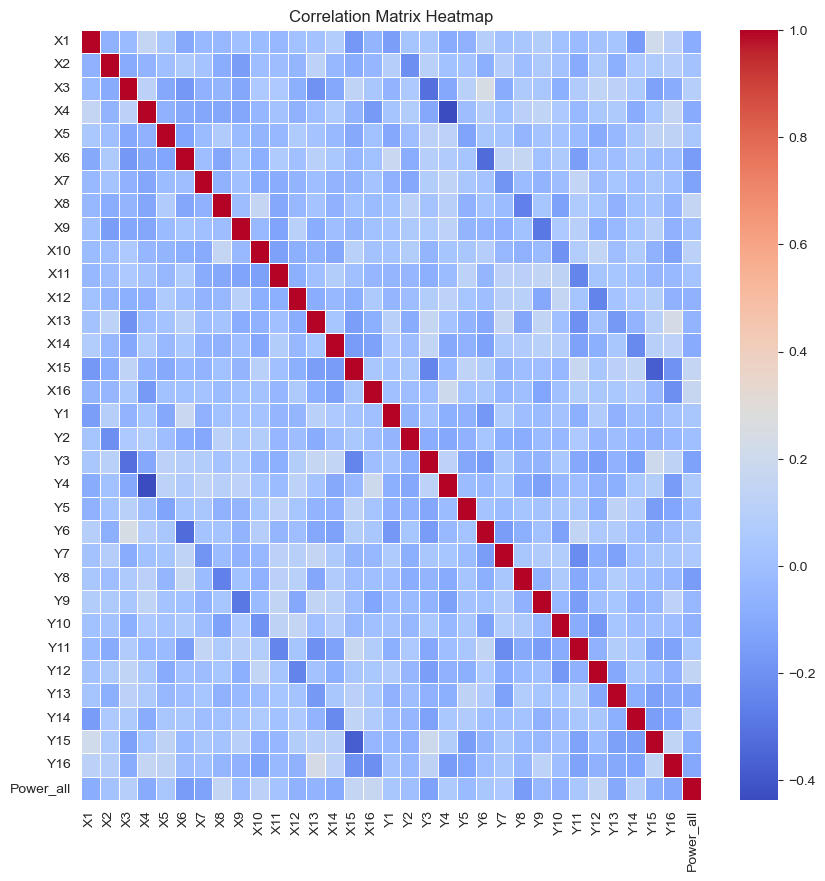

In [32]:
correlation_matrix = adelaide_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

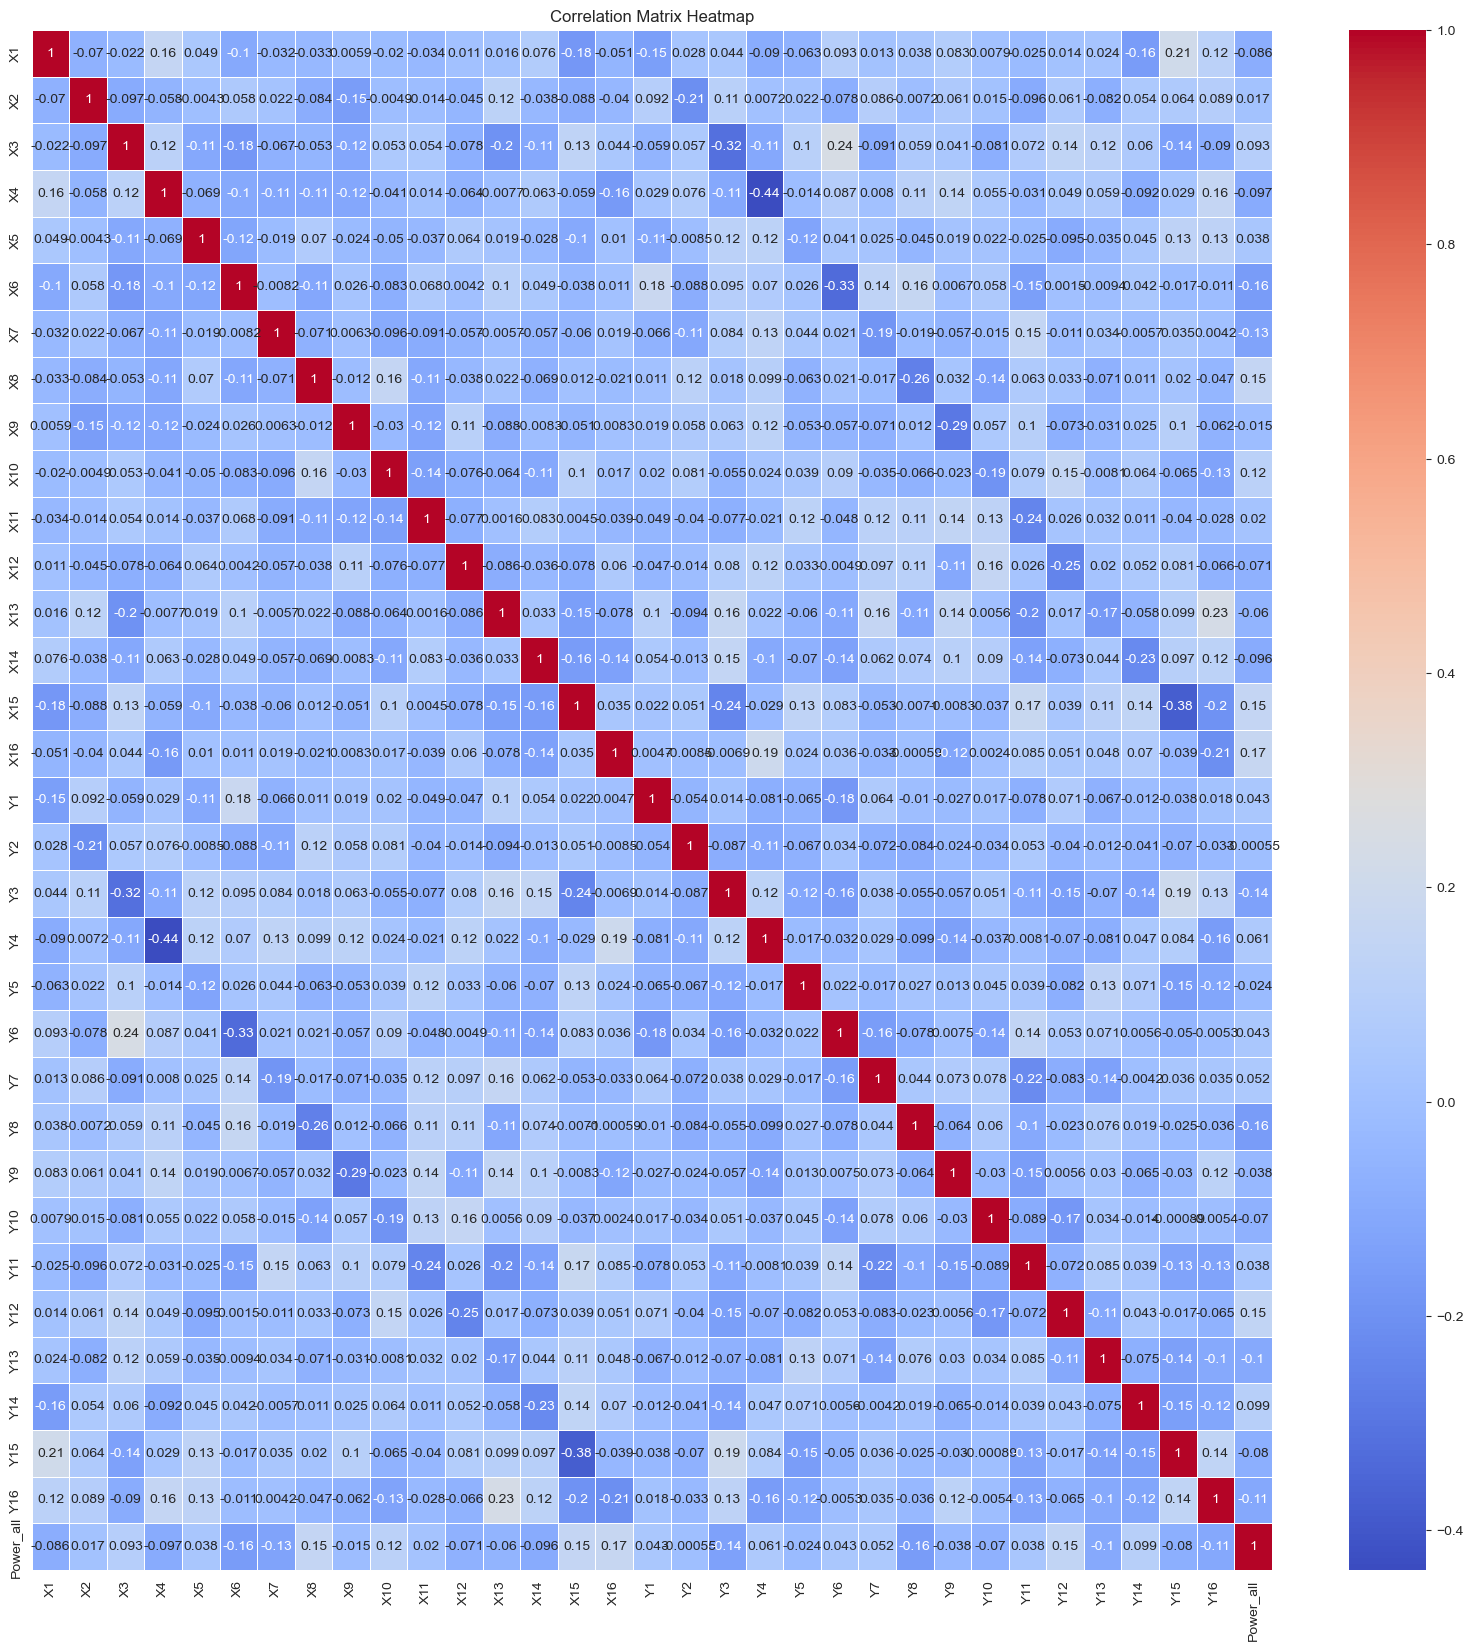

In [33]:
correlation_matrix = adelaide_df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix,annot = True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

### X,Y  histograms and boxplots

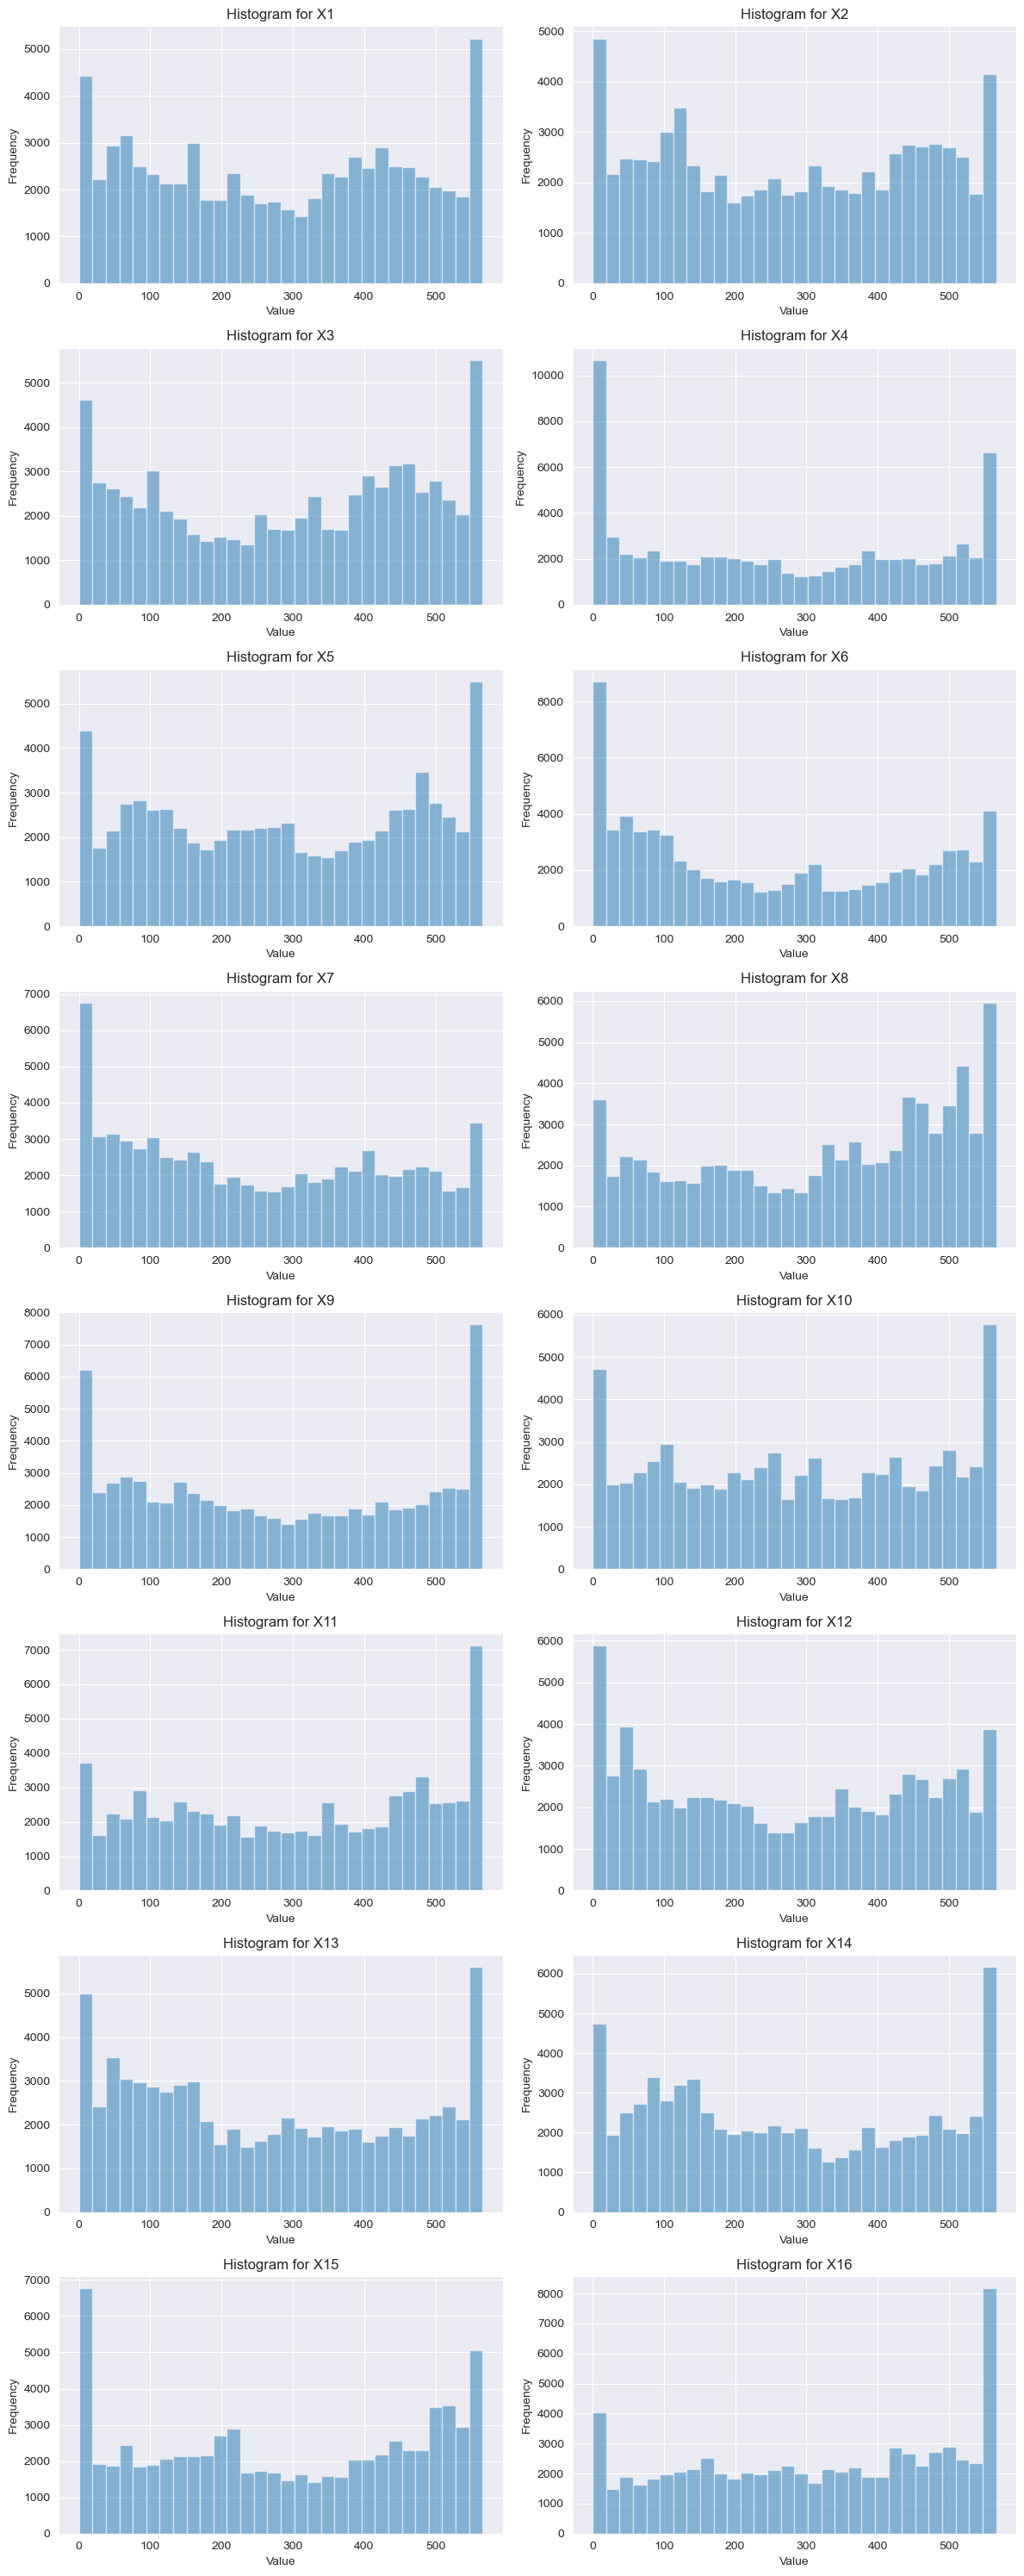

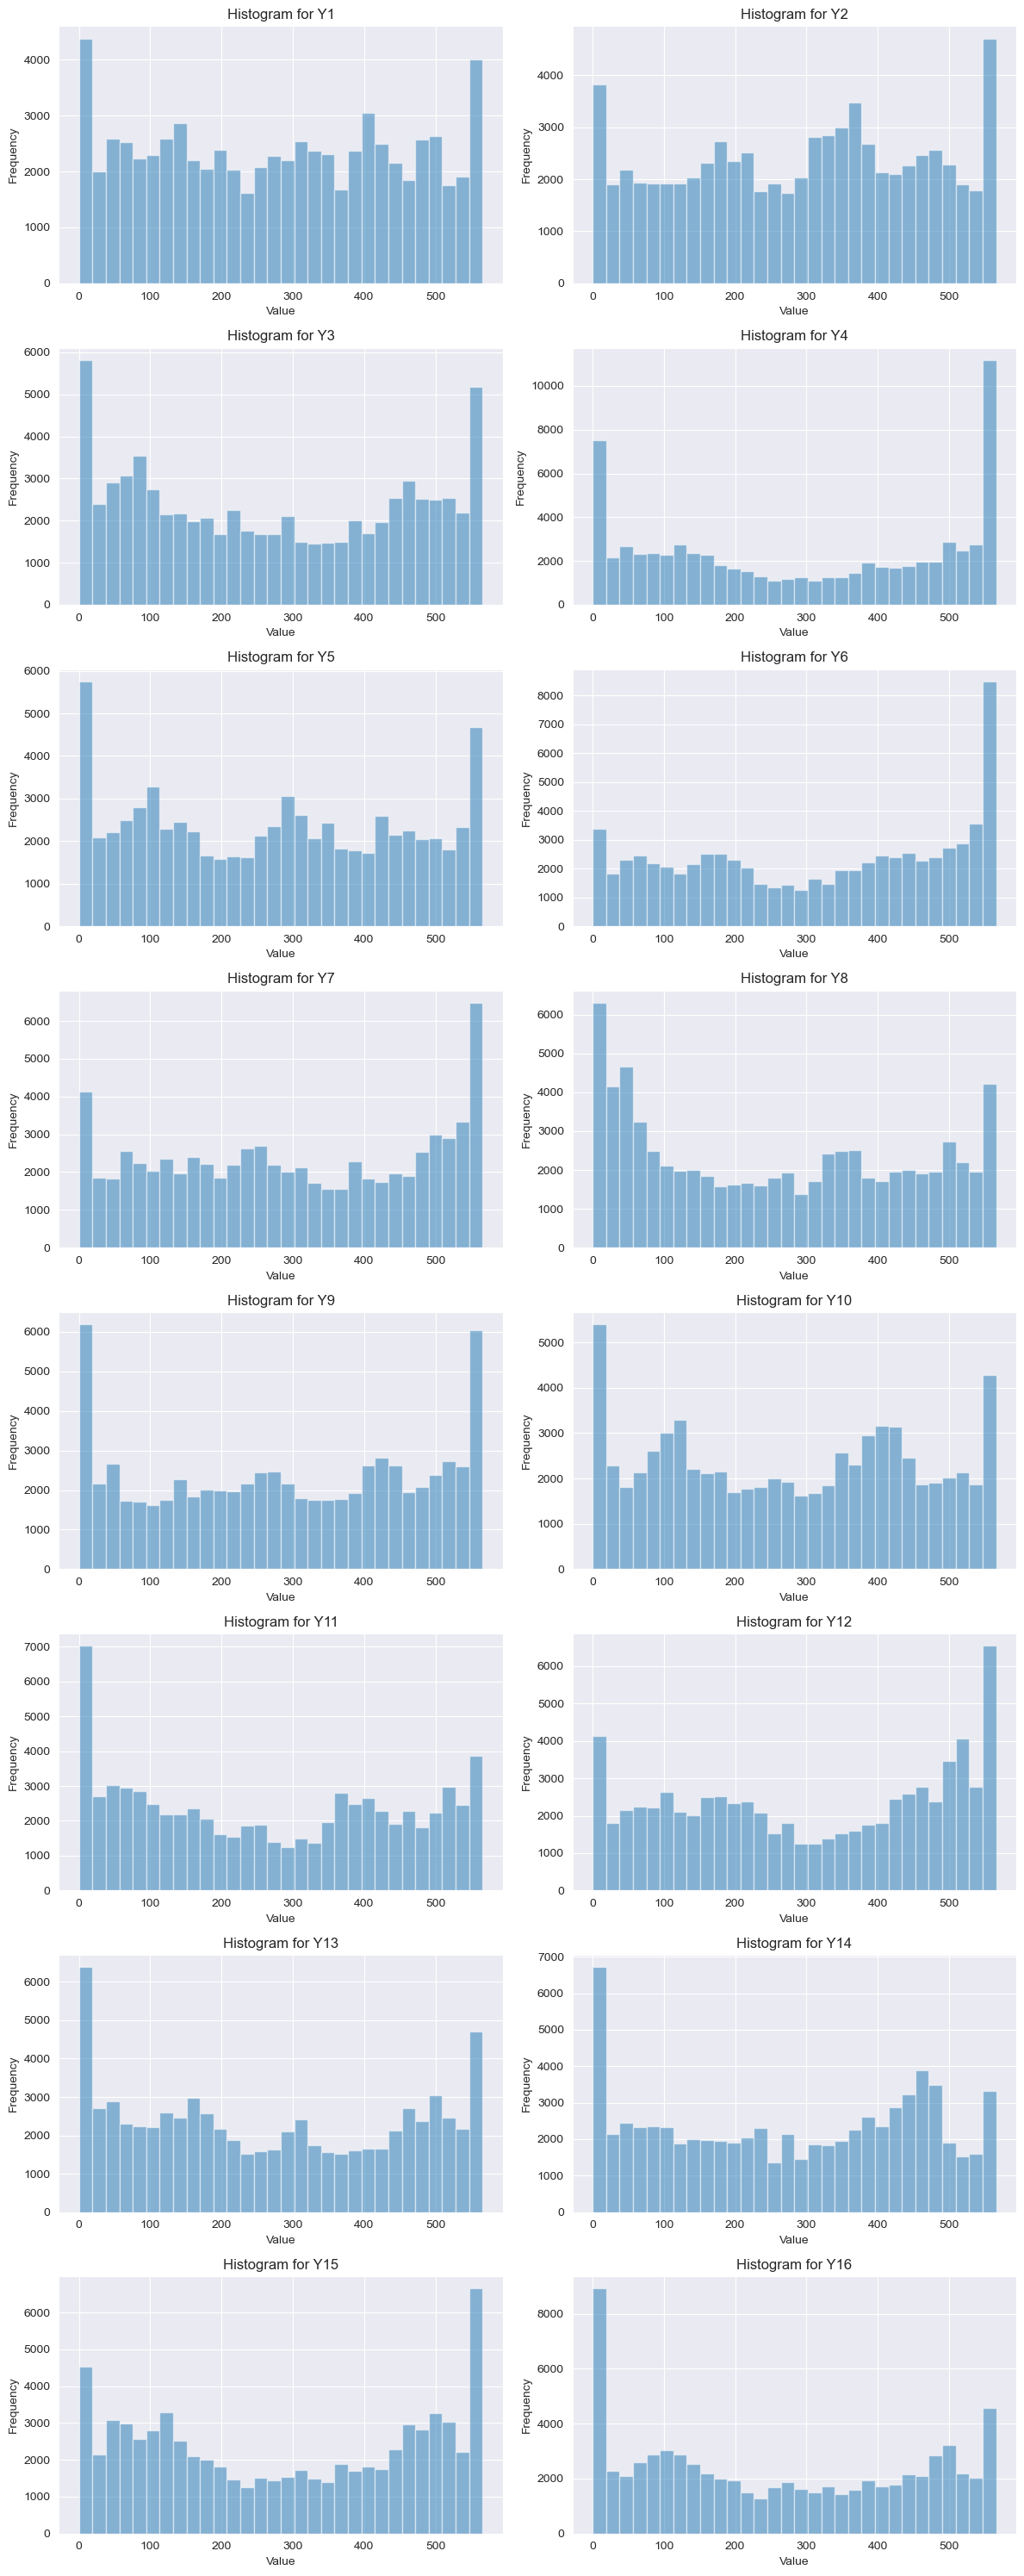

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [34]:
fig, axes = plt.subplots(8, 2, figsize=(12, 30))
for i, ax in enumerate(axes.flatten()):
    adelaide_df[f"X{i+1}"].plot(kind='hist', bins=30, alpha=0.5, ax=ax)
    ax.set_title(f'Histogram for X{i+1}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(8, 2, figsize=(12, 30))
for i, ax in enumerate(axes.flatten()):
    adelaide_df[f"Y{i+1}"].plot(kind='hist', bins=30, alpha=0.5, ax=ax)
    ax.set_title(f'Histogram for Y{i+1}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()


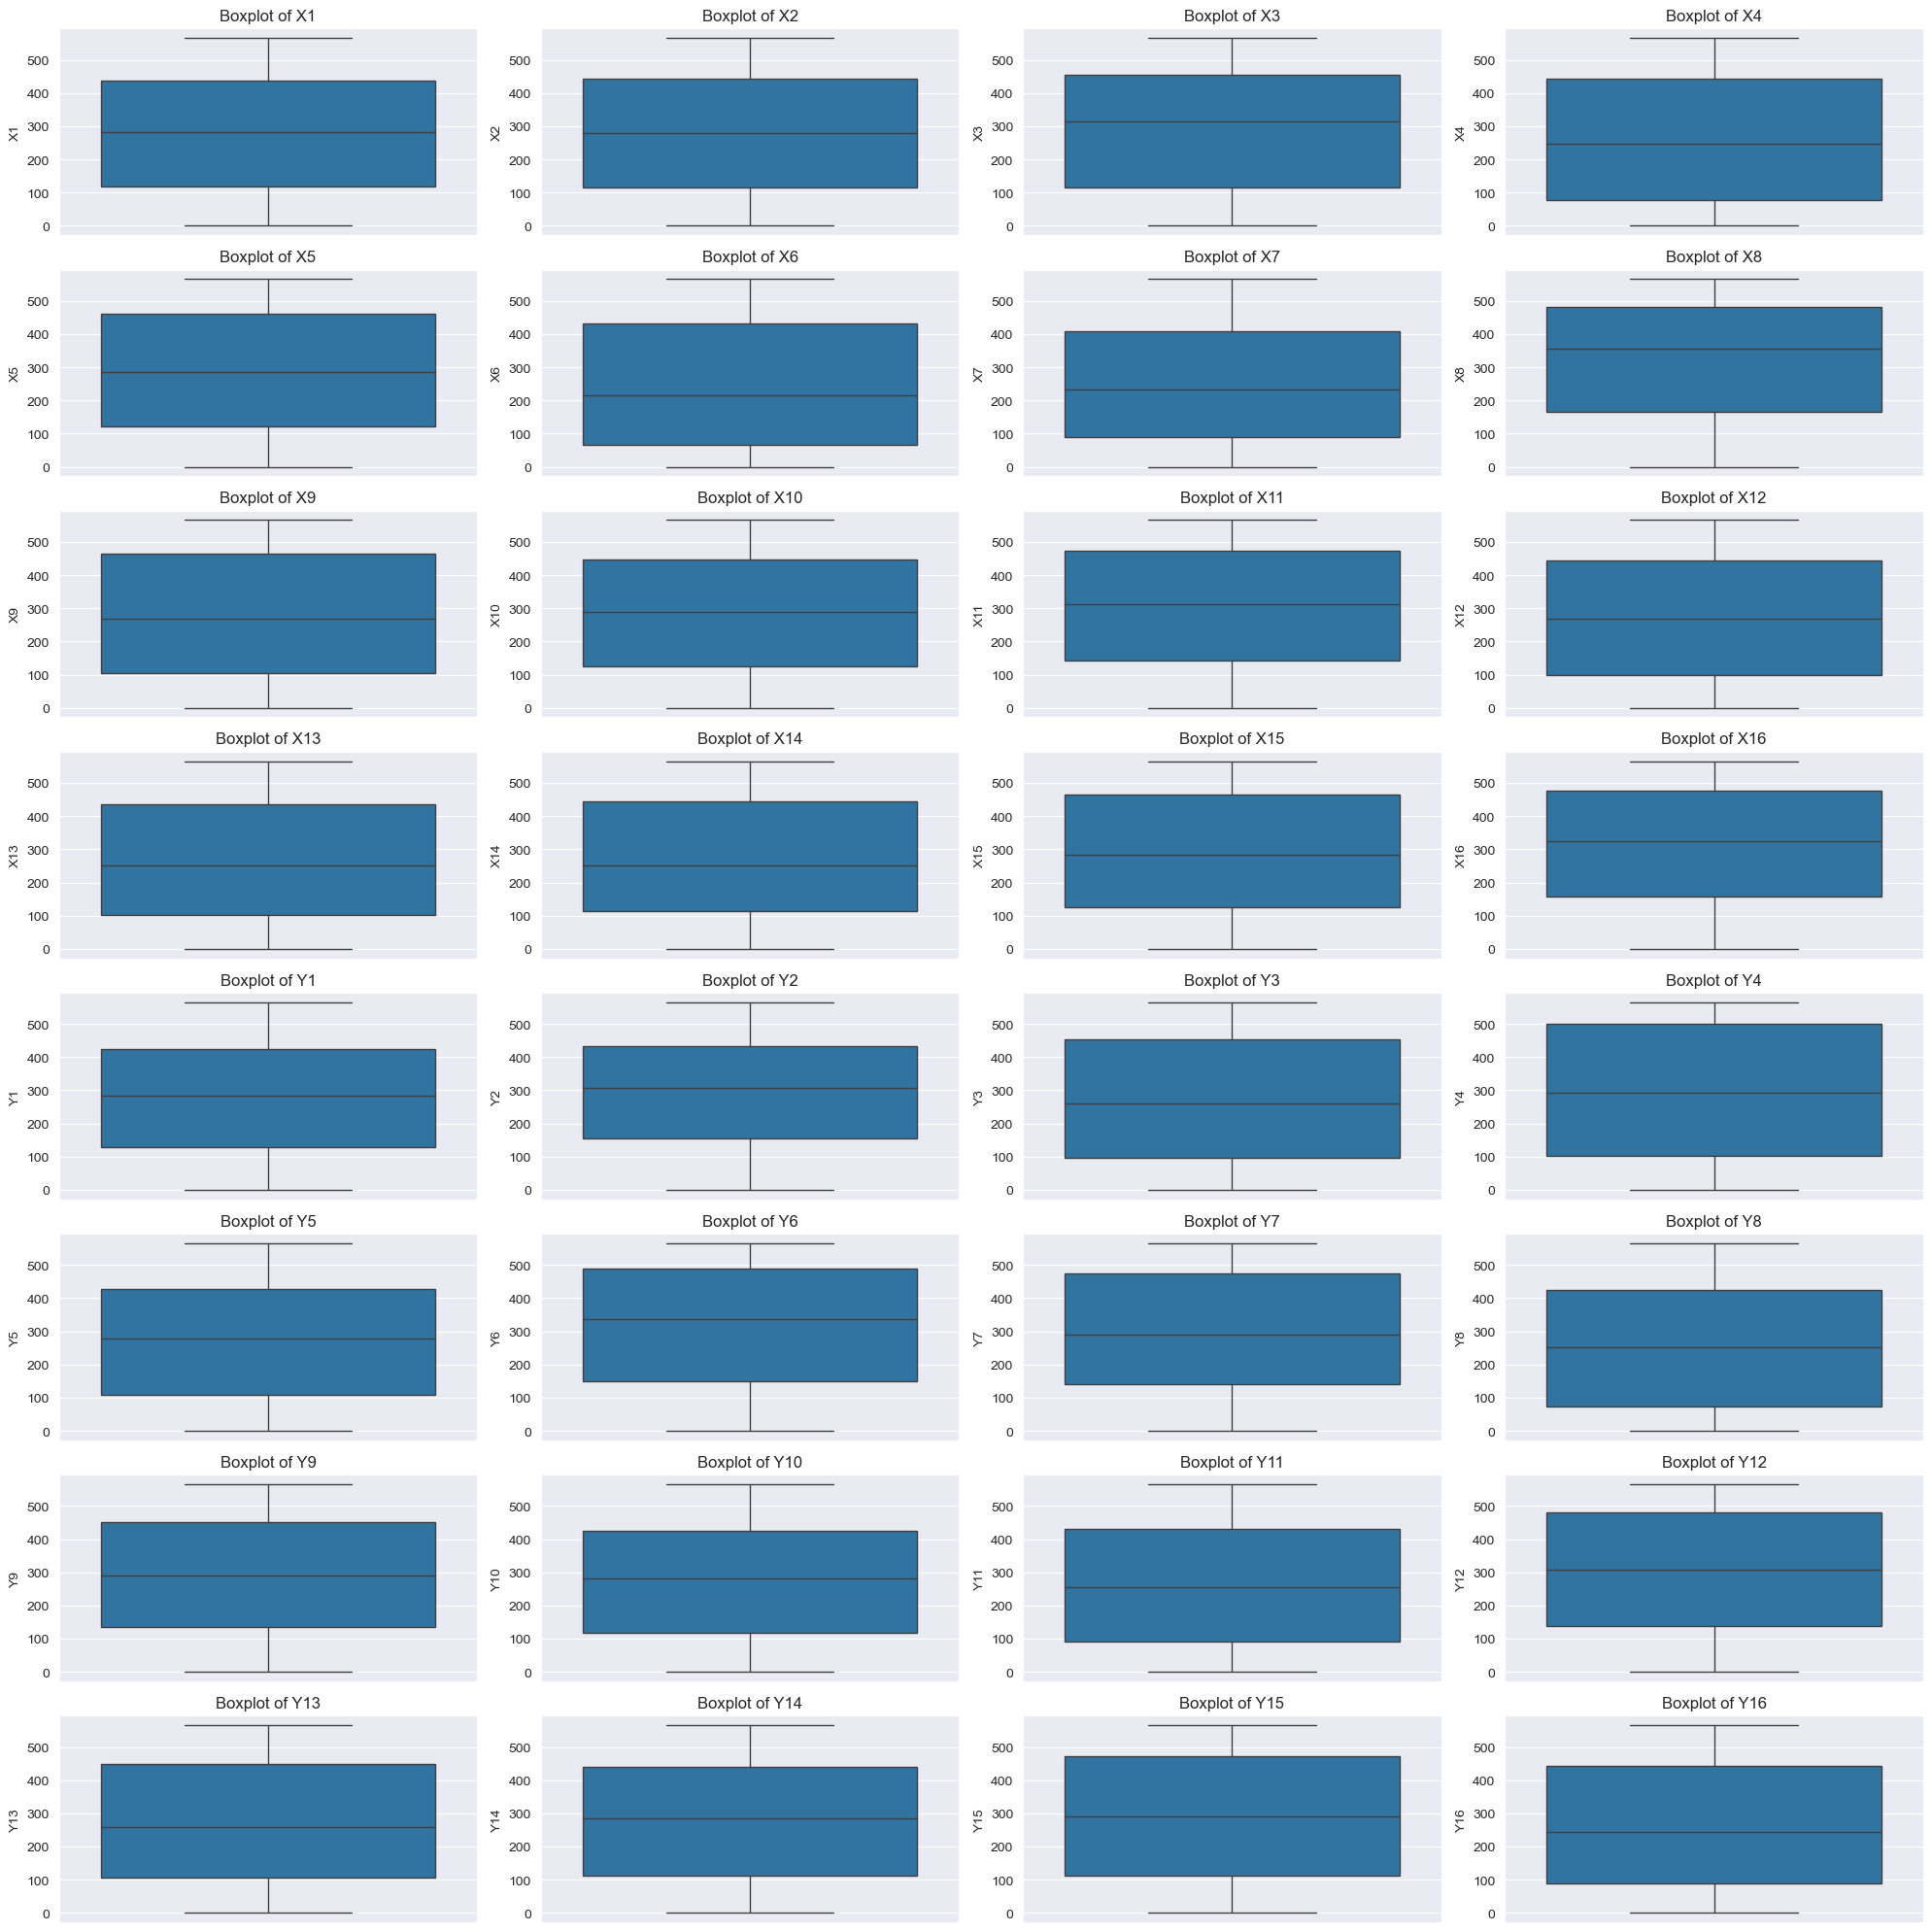

In [35]:
columns_to_plot = [f"X{i}" for i in range(1, 17)] + [f"Y{i}" for i in range(1, 17)]
plt.figure(figsize=(20, 20))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(8, 4, i)
    sns.boxplot(y=adelaide_df[column])
    plt.title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()


### "Power all" histogram and boxplot, which show us outliers that has to be removed

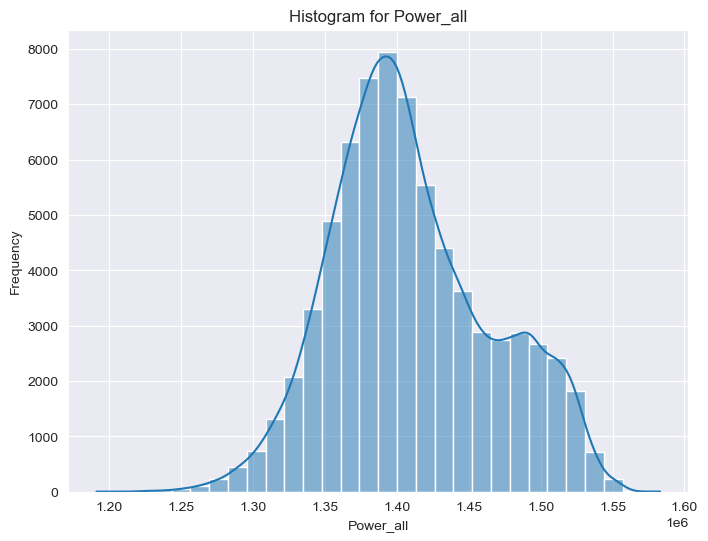

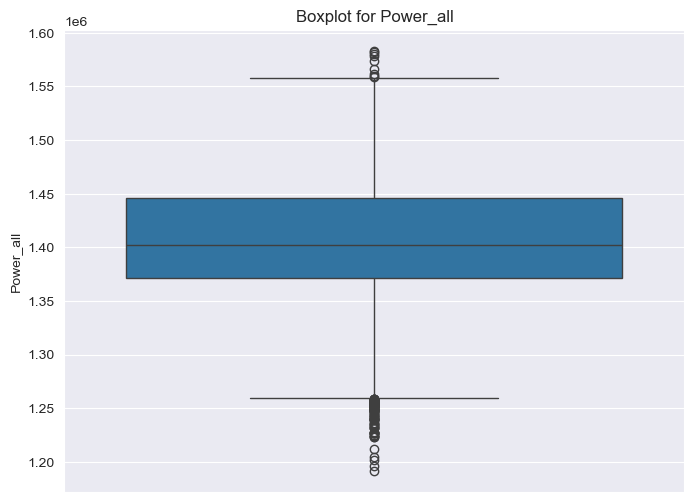

In [36]:
# Histogram dla kolumny Power_all
# sydney_df['Power_all'] = np.log(sydney_df['Power_all'] - sydney_df['Power_all'].min() + 1)

plt.figure(figsize=(8, 6))
sns.histplot(adelaide_df['Power_all'], kde=True, bins=30)
plt.title('Histogram for Power_all')
plt.xlabel('Power_all')
plt.ylabel('Frequency')
plt.show()

# Boxplot dla kolumny Power_all
plt.figure(figsize=(8, 6))
sns.boxplot(y=adelaide_df['Power_all'])
plt.title('Boxplot for Power_all')
plt.ylabel('Power_all')
plt.show()

In [37]:
upper_limit = adelaide_df['Power_all'].mean() + 3 * adelaide_df['Power_all'].std()
lower_limit = adelaide_df['Power_all'].mean() - 3 * adelaide_df['Power_all'].std()


print(upper_limit)
print(lower_limit)

final_df_new = adelaide_df.loc[(adelaide_df['Power_all'] < upper_limit) & (adelaide_df['Power_all'] > lower_limit)]


print("Liczba wierszy po filtracji:", len(final_df_new))
print("Oryginalna liczba wierszy:", len(adelaide_df))

perth_df = final_df_new


1578095.756402539
1242050.8004700965
Liczba wierszy po filtracji: 71958
Oryginalna liczba wierszy: 71998


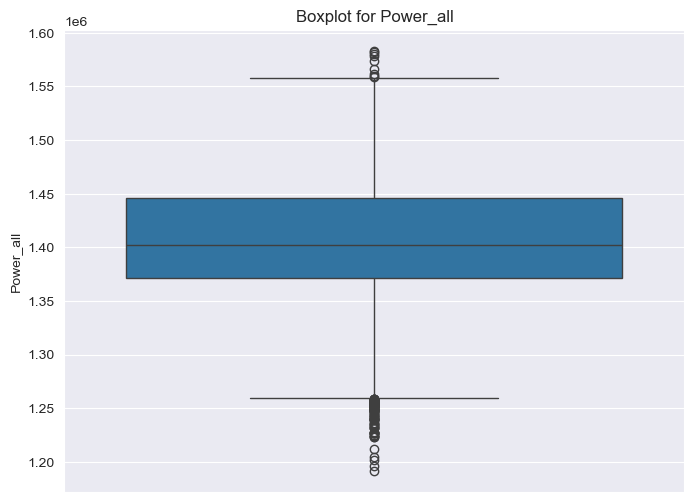

In [38]:
# Boxplot dla kolumny Power_all
plt.figure(figsize=(8, 6))
sns.boxplot(y=adelaide_df['Power_all'])
plt.title('Boxplot for Power_all')
plt.ylabel('Power_all')
plt.show()

(array([ 2.,  0.,  0.,  0.,  2.,  0.,  0.,  2.,  2.,  0.,  2.,  0.,  4.,
         4.,  4.,  4.,  6.,  4., 12., 22., 32., 12., 50., 32., 50., 70.,
        52., 50., 54., 66., 58., 78., 56., 58., 60., 32., 36., 32., 30.,
        28., 16., 18.,  6.,  4.,  0.,  2.,  2.,  2.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 33.]),
 array([-0.43689738, -0.42252841, -0.40815943, -0.39379046, -0.37942149,
        -0.36505251, -0.35068354, -0.33631456, -0.32194559, -0.30757662,
        -0.29320764, -0.27883867, -0.26446969, -0.25010072, -0.23573175,
        -0.22136277, -0.2069938 , -0.19262483, -0.17825585, -0.16388688,
        -0.1495179 , -0.13514893, -0.12077996, -0.10641098, -0.09204201,
        -0.07767304, -0.06330406, -0.04893509, -0.03456611, -0.020197

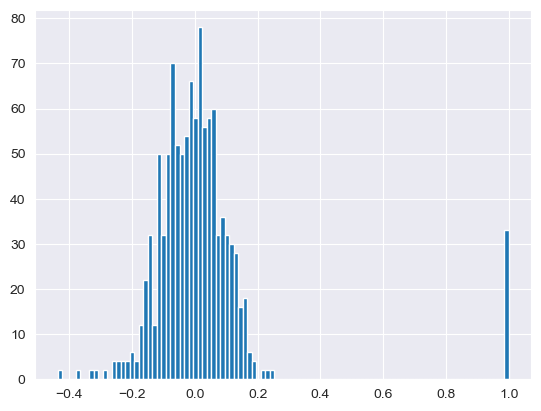

In [39]:
tab=np.array(correlation_matrix).reshape(-1)
plt.hist(tab, bins=100)

# Model Training
### Data split into train, test and validation sets

In [40]:
# Przygotowanie cech (X) i etykiety (y)
X = adelaide_df[[f"X{i}" for i in range(1, 17)] + [f"Y{i}" for i in range(1, 17)]]
y = adelaide_df["Power_all"]

# Podział na zestawy train, validation i test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% train, 20% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 10% val, 10% test

# Informacja o rozmiarach zbiorów
print(f"Train set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Train set: 57598 samples
Validation set: 7200 samples
Test set: 7200 samples


### Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Funkcja do obliczania MSE i RMSE
def calculate_rmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mse, rmse

# Model: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Przewidywania na zbiorze walidacyjnym
y_val_pred_lr = lr.predict(X_val)

# Obliczanie MSE, RMSE dla walidacji
mse_val, rmse_val = calculate_rmse(y_val, y_val_pred_lr)

# Obliczanie współczynnika determinacji R² dla walidacji
r2_val = lr.score(X_val, y_val)

# Przewidywania na zbiorze testowym
y_test_pred_lr = lr.predict(X_test)

# Obliczanie MSE, RMSE dla testu
mse_test, rmse_test1 = calculate_rmse(y_test, y_test_pred_lr)

# Obliczanie współczynnika determinacji R² dla testu
r2_test = lr.score(X_test, y_test)

# Wyświetlanie wyników dla walidacji i testu
print(f"Validation set - MSE: {mse_val}, RMSE: {rmse_val}, R²: {r2_val}")
print(f"Test set - MSE: {mse_test}, RMSE: {rmse_test1}, R²: {r2_test}")


Validation set - MSE: 2600878369.936575, RMSE: 50998.80753445687, R²: 0.17188406773418585
Test set - MSE: 2567114004.903023, RMSE: 50666.695223815645, R²: 0.18144471516695138


### Gradient Boosting

In [42]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Definicja hiperparametrów do przetestowania
param_grid = {
    'n_estimators': [100, 200],  # Zmniejszono do dwóch wartości
    'max_depth': [3, 5],  # Zmniejszono do dwóch wartości
    'learning_rate': [0.1, 0.2]  # Zmniejszono do dwóch wartości
}

# Tworzenie modelu Gradient Boosting
model = GradientBoostingRegressor(random_state=42)

# Grid Search z walidacją krzyżową
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # używamy MSE jako funkcji kosztu
    cv=3,  # liczba podziałów do walidacji krzyżowej
    verbose=1,
    n_jobs=-1  # równoległe przetwarzanie
)

# Dopasowanie modelu do danych treningowych
grid_search.fit(X_train, y_train)

# Najlepszy model i jego hiperparametry
best_model = grid_search.best_estimator_
print("Najlepsze hiperparametry:", grid_search.best_params_)

# Ocena na zbiorze walidacyjnym
y_val_pred = best_model.predict(X_val)

# Obliczanie MSE, RMSE i R² dla walidacji
mse = mean_squared_error(y_val, y_val_pred)
rmse_gb = np.sqrt(mse)
r2_gb = r2_score(y_val, y_val_pred)

# Wyświetlanie wyników dla walidacji
print(f"Gradient Boosting (Validation) - MSE: {mse}, RMSE: {rmse_gb}, R²: {r2_gb}")

# Ocena na zbiorze testowym
y_test_pred = best_model.predict(X_test)

# Obliczanie MSE, RMSE i R² dla testu
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test2 = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Wyświetlanie wyników dla testu
print(f"Gradient Boosting (Test) - MSE: {mse_test}, RMSE: {rmse_test2}, R²: {r2_test}")




Fitting 3 folds for each of 8 candidates, totalling 24 fits
Najlepsze hiperparametry: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Gradient Boosting (Validation) - MSE: 369075917.507854, RMSE: 19211.34866447054, R²: 0.8824867586901688
Gradient Boosting (Test) - MSE: 361860478.6607359, RMSE: 19022.630697691, R²: 0.8846164188212001


### Random Forest for 10k samples

In [43]:
# Ograniczenie danych do 10 tysięcy próbek
subset_df = perth_df.sample(n=10000, random_state=42)

# Przygotowanie cech (X) i celu (y) dla podzbioru danych
X_subset = subset_df[[f"X{i}" for i in range(1, 17)] + [f"Y{i}" for i in range(1, 17)]]
y_subset = subset_df["Power_all"]

# Podział na zbiory train, validation i test
X_train_sub, X_temp_sub, y_train_sub, y_temp_sub = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)
X_val_sub, X_test_sub, y_val_sub, y_test_sub = train_test_split(X_temp_sub, y_temp_sub, test_size=0.5, random_state=42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Definicja przestrzeni hiperparametrów
param_dist = {
    'n_estimators': [200, 300],
    'max_depth': [20, 30],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2],
}

# Tworzenie modelu Random Forest
rf = RandomForestRegressor(random_state=42)

# RandomizedSearchCV dla podzbioru danych
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=16,  # Liczba losowych kombinacji do przetestowania
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    error_score="raise"
)

# Dopasowanie modelu do podzbioru danych treningowych
random_search.fit(X_train_sub, y_train_sub)

# Najlepszy model i jego hiperparametry
best_rf = random_search.best_estimator_
print("Najlepsze hiperparametry:", random_search.best_params_)

# Ocena na zbiorze walidacyjnym
y_val_pred_rf = best_rf.predict(X_val_sub)
mse_rf = mean_squared_error(y_val_sub, y_val_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_val_sub, y_val_pred_rf)

print(f"Random Forest (Validation) - MSE: {mse_rf}, RMSE: {rmse_rf}, R^2: {r2_rf}")

# Ocena na zbiorze testowym
y_test_pred_rf = best_rf.predict(X_test_sub)
mse_test_rf = mean_squared_error(y_test_sub, y_test_pred_rf)
rmse_test_rf = np.sqrt(mse_test_rf)
r2_test_rf = r2_score(y_test_sub, y_test_pred_rf)

print(f"Random Forest (Test) - MSE: {mse_test_rf}, RMSE: {rmse_test_rf}, R^2: {r2_test_rf}")


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Najlepsze hiperparametry: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Random Forest (Validation) - MSE: 668239217.0895125, RMSE: 25850.32334593733, R^2: 0.7933769960284763
Random Forest (Test) - MSE: 640081432.4731355, RMSE: 25299.83068072068, R^2: 0.7765526159666564


### XgBoost

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Najlepsze hiperparametry: {'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1}
XGBoost (Validation) - MSE: 375234072.74241936, RMSE: 19370.95952043727, R²: 0.8805260109204704
XGBoost (Test) - MSE: 362180647.2930717, RMSE: 19031.04430379667, R²: 0.8845143291884313


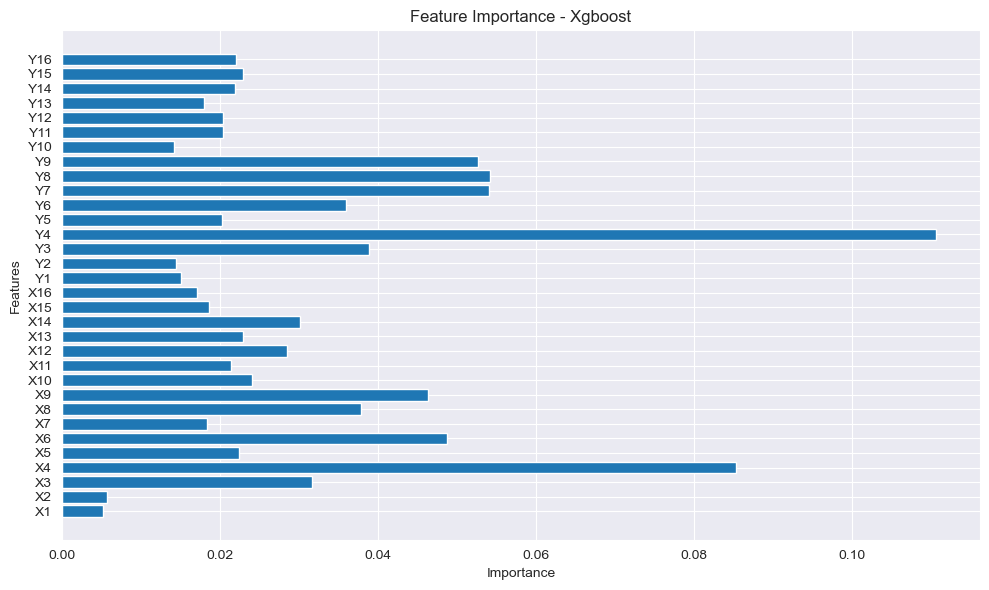

In [44]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

# Definicja ograniczonej przestrzeni hiperparametrów
param_dist = {
    'n_estimators': [100, 200],  # Liczba drzew
    'max_depth': [5, 10],  # Maksymalna głębokość drzewa
    'learning_rate': [0.05, 0.1]  # Szybkość uczenia
}

# Tworzenie modelu XGBoost
model = xgb.XGBRegressor(random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=8,  # Liczba losowych kombinacji do przetestowania
    scoring='neg_mean_squared_error',  # Funkcja kosztu
    cv=3,  # Liczba podziałów do walidacji krzyżowej
    verbose=2,
    random_state=42,
    n_jobs=-1  # Użycie wszystkich rdzeni procesora
)

# Dopasowanie RandomizedSearchCV
random_search.fit(X_train, y_train)

# Najlepszy model i hiperparametry
best_xgb = random_search.best_estimator_
print("Najlepsze hiperparametry:", random_search.best_params_)

# Ocena na zbiorze walidacyjnym
y_val_pred = best_xgb.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val, y_val_pred)

print(f"XGBoost (Validation) - MSE: {mse_val}, RMSE: {rmse_val}, R²: {r2_val}")

# Ocena najlepszego modelu na zbiorze testowym
y_test_pred = best_xgb.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test3 = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print(f"XGBoost (Test) - MSE: {mse_test}, RMSE: {rmse_test3}, R²: {r2_test}")




# Feature Importance
feature_importance = best_xgb.feature_importances_
feature_names = X_train.columns

# Wizualizacja Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.title("Feature Importance - Xgboost")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


### LightGBM

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005390 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8160
[LightGBM] [Info] Number of data points in the train set: 57598, number of used features: 32
[LightGBM] [Info] Start training from score 1410050.656492
Najlepsze hiperparametry: {'num_leaves': 31, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1}
LightGBM (Validation) - MSE: 361022197.6559794, RMSE: 19000.584139862105, R²: 0.8850510515077162
LightGBM (Test) - MSE: 359775645.8487961, RMSE: 18967.752788582948, R²: 0.8852811929266536


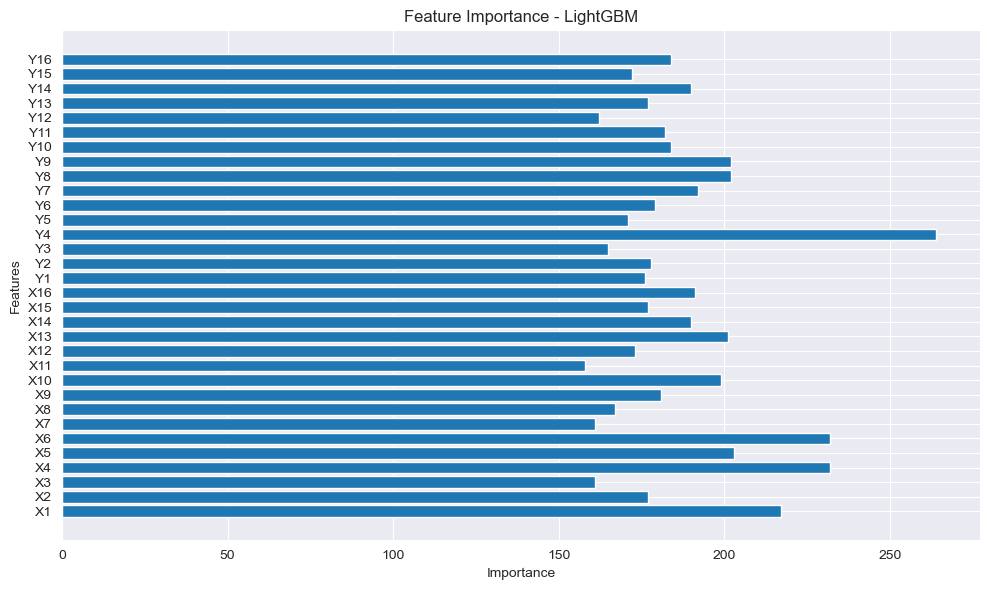

In [45]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

# Definicja ograniczonej przestrzeni hiperparametrów
param_dist = {
    'n_estimators': [100, 200],  # Liczba drzew
    'max_depth': [5, 10],  # Maksymalna głębokość drzewa
    'learning_rate': [0.05, 0.1],  # Szybkość uczenia
    'num_leaves': [31, 50],  # Liczba liści w każdym drzewie
}

# Tworzenie modelu LightGBM
model = lgb.LGBMRegressor(random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=8,  # Liczba losowych kombinacji do przetestowania
    scoring='neg_mean_squared_error',  # Funkcja kosztu
    cv=3,  # Liczba podziałów do walidacji krzyżowej
    verbose=2,
    random_state=42,
    n_jobs=-1  # Użycie wszystkich rdzeni procesora
)

# Dopasowanie RandomizedSearchCV
random_search.fit(X_train, y_train)

# Najlepszy model i hiperparametry
best_lgbm = random_search.best_estimator_
print("Najlepsze hiperparametry:", random_search.best_params_)

# Ocena na zbiorze walidacyjnym
y_val_pred = best_lgbm.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val, y_val_pred)

print(f"LightGBM (Validation) - MSE: {mse_val}, RMSE: {rmse_val}, R²: {r2_val}")

# Ocena najlepszego modelu na zbiorze testowym
y_test_pred = best_lgbm.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test4 = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print(f"LightGBM (Test) - MSE: {mse_test}, RMSE: {rmse_test4}, R²: {r2_test}")


# Feature Importance
feature_importance = best_lgbm.feature_importances_
feature_names = X_train.columns

# Wizualizacja Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.title("Feature Importance - LightGBM")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

### And the best model is..

In [46]:
model_performance = {
    "Linear Regression": rmse_test1,
    "Gradient Boosting": rmse_test2,
    "Random Forest": rmse_rf,
    "XGBoost": rmse_test3,
    "LGBM": rmse_test4

}

#Wybieramy najlepszy model
best_model_name = min(model_performance, key=model_performance.get)
print(f"Best model based on validation RMSE: {best_model_name}")

Best model based on validation RMSE: LGBM
